# Sea Data - Clustering

Il dataset considerato nel seguente esempio contiene caratteristiche oceanografiche relative ai mari italiani, in particolare al Mare Adriatico e al Mar Ionio (sulla costa orientale dell'Italia). L'obiettivo è quello di utilizzare l'algoritmo K-means per identificare e raggruppare regioni simili lungo la costa orientale dell'Italia in base ai parametri ambientali e oceanografici.

Dopo una prima parte di esplorazione dei dati, applicheremo l'algoritmo di clustering **K-means** e vedremo alcune tecniche per trovare il numero di cluster *k* ottimale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import json
from matplotlib.colors import ListedColormap

<a id="1"></a> <br>
## 1. Pre-processing dei dati

Lo step fondamentale prima di applicare un modello di Machine Learning è quello di studiare le caratteristiche principali dei dati per renderli utilizzabili dal modello che sceglieremo. In questa sezione, metteremo in pratica le tecniche viste nelle precedenti lezioni per analizzare il dataset, in particolare dovremo:
- caricare il dataset
- estrarre le prime descrizioni generali (dimensione, tipo di dati, variabili, ...)
- selzionare le variabili utili
- standardizzare i valori

- Caricamento del dataset e descrizione generale

In [2]:
# Caricamento del dataset
df = pd.read_csv('../data/sea_data.csv')

# Stampa le prime dieci righe
df.head(10)

,Unnamed: 0,kg_km2,X,Y,X.utm,Y.utm,month,year,depth,CHL,TMP_sst,TMP_bot,dox.bot,nit,pho,sal,poc
0,20939,7.485764,13.384833,45.120083,372.963807,4997.561102,7,2018,36.0,0.224064,26.043629,19.707651,239.657623,0.013379,0.018543,38.588749,23.537426
1,21018,11.459228,13.406333,45.364833,375.191855,5024.711693,7,2018,26.5,0.128789,25.943130,22.997463,245.417542,0.177281,0.015412,38.622391,17.803989
2,21019,10.860599,13.435083,45.173917,377.035673,5003.459931,7,2018,32.0,0.169480,25.966240,21.745878,237.668228,0.019241,0.014996,38.596682,23.214342
3,31558,13.662421,12.831000,44.041500,326.222157,4878.769372,8,2018,13.5,0.191076,28.161364,28.883532,203.521378,2.562008,0.036216,35.955530,23.716934
4,31723,7.452406,15.111500,42.024833,509.230579,4652.535759,8,2018,24.5,0.125584,28.041786,24.099413,235.758652,1.157649,0.014959,37.187318,15.128001
5,32206,11.212923,14.881917,42.119583,490.237575,4663.062163,8,2018,21.5,0.126854,28.086605,21.321623,233.944595,1.425746,0.016569,37.113224,14.563282
6,32834,8.745386,14.448833,42.392333,454.632319,4693.481469,8,2018,22.5,0.087200,27.890226,27.649984,187.429733,1.919207,0.012661,36.421363,8.784841
7,32835,9.367967,14.068333,42.790917,423.801398,4738.015912,8,2018,17.0,0.133999,27.953697,26.174212,221.077942,1.970866,0.017334,36.389070,14.999536
8,32958,10.892042,13.942917,43.225750,414.153393,4786.432404,8,2018,20.0,0.150982,27.824467,21.284454,241.337921,1.137582,0.020106,37.375933,18.425243
9,32959,9.867924,13.830083,43.366583,405.211861,4802.190958,8,2018,14.5,0.149093,28.116535,28.288252,175.456223,2.638477,0.015171,35.541397,13.337701


In [3]:
# Che dimensione ha il dataset? Quante righe e quante colonne ha?
df.shape

(321, 17)

In [4]:
# Quali sono i nomi delle variabili presenti nel dataset?
df.columns.to_list()

['Unnamed: 0',
 'kg_km2',
 'X',
 'Y',
 'X.utm',
 'Y.utm',
 'month',
 'year',
 'depth',
 'CHL',
 'TMP_sst',
 'TMP_bot',
 'dox.bot',
 'nit',
 'pho',
 'sal',
 'poc']

Il dataset contiene le seguenti variabili:
- kg_km2 = kilograms per square kilometre (index) of a marine species x
- X = longitude
- Y = latitude
- X.utm = longitude in UTM
- Y.utm = latitude in UTM
- month = month (june, july and august)
- year = only 2018
- depth = depth at that point falls (this is experimental fishing data)
- CHL = chlorophyll mg/m3 average in water column
- TMP_sst = surface temperature (°C)
- TMP_bot = bottom temperature
- dox.bot = bottom dissolved oxygen mmol/m3
- nit = nitrate mean water column mmol/m3
- pho = phosphates mean water column mmol/m3
- sal = surface salinity
- poc = particulate organic carbon mg/m3

In [5]:
# Alcune informazioni sulla struttura del dataset
print("Dataset overview\n")
df.info()

# Caratteristiche statistiche principali per le variabili numeriche
print("Descriptive statistics\n")
display(df.describe())

Dataset overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  321 non-null    int64  
 1   kg_km2      321 non-null    float64
 2   X           321 non-null    float64
 3   Y           321 non-null    float64
 4   X.utm       321 non-null    float64
 5   Y.utm       321 non-null    float64
 6   month       321 non-null    int64  
 7   year        321 non-null    int64  
 8   depth       321 non-null    float64
 9   CHL         321 non-null    float64
 10  TMP_sst     321 non-null    float64
 11  TMP_bot     321 non-null    float64
 12  dox.bot     321 non-null    float64
 13  nit         321 non-null    float64
 14  pho         321 non-null    float64
 15  sal         321 non-null    float64
 16  poc         321 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 42.8 KB
Descriptive statistics



,Unnamed: 0,kg_km2,X,Y,X.utm,Y.utm,month,year,depth,CHL,TMP_sst,TMP_bot,dox.bot,nit,pho,sal,poc
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,12327.012461,10.131917,15.866815,42.036521,574.816348,4655.647986,7.585670,2018.0,175.722741,0.130792,26.657169,15.531040,218.941150,0.740525,0.062828,38.520895,11.491578
std,18186.079179,1.986901,1.717573,1.997079,142.491016,221.121044,0.512024,0.0,180.862990,0.075733,1.428399,3.365090,17.077021,0.819098,0.033655,0.508759,12.885781
min,1.000000,5.126005,12.399917,36.924417,293.953503,4086.543331,6.000000,2018.0,10.000000,0.039067,23.180279,10.888730,169.066315,0.004008,0.008272,35.541397,0.002239
25%,2667.000000,8.743539,14.584167,40.677250,466.537145,4508.956237,7.000000,2018.0,56.000000,0.076259,25.603487,13.918765,213.298737,0.259012,0.030815,38.555463,2.936067
50%,6031.000000,10.118675,16.133500,42.295083,593.377845,4682.543434,8.000000,2018.0,106.500000,0.112589,27.474957,14.408455,217.777420,0.502117,0.064708,38.665287,9.263744
75%,8656.000000,11.499515,17.040583,43.522000,673.343615,4819.133336,8.000000,2018.0,208.500000,0.164412,27.825163,15.521293,224.569946,1.137582,0.089481,38.770515,15.912208
max,65916.000000,16.532206,19.104750,45.646333,843.155367,5055.747550,8.000000,2018.0,713.500000,0.716477,28.206041,28.883532,426.693512,9.652381,0.165064,38.874602,152.468674


- Valori nulli

In [6]:
# Quanti valori nulli ci sono in ogni colonna?
print("Missing values\n")
df.isnull().sum()

Missing values



Unnamed: 0    0
kg_km2        0
X             0
Y             0
X.utm         0
Y.utm         0
month         0
year          0
depth         0
CHL           0
TMP_sst       0
TMP_bot       0
dox.bot       0
nit           0
pho           0
sal           0
poc           0
dtype: int64

In [7]:
# Valutiamo se ci sono duplicati in seguito alla nostra operazione e in caso affermativo li rimuoviamo
df.duplicated().sum()

np.int64(0)

- Standardizzazione

In [8]:
# Prima di iniziare l'analisi, selezioniamo un sottoinsieme di variabili 
myvars = ["CHL","TMP_sst", "TMP_bot", "dox.bot","nit","pho","sal","poc"]
data = df[myvars]

In [9]:
# Standardizzazione
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=myvars)


- Correlazione

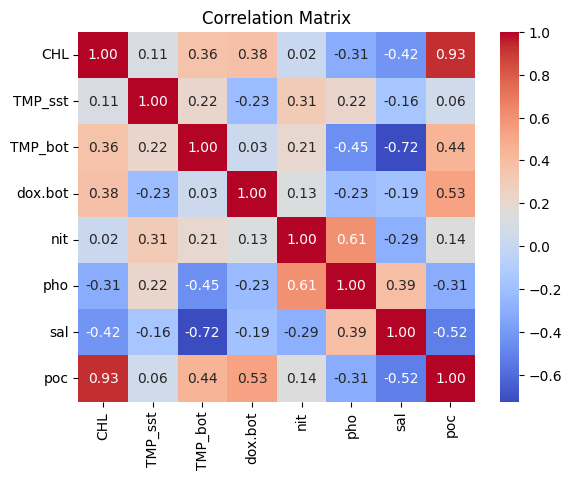

In [10]:
# Matrice di correlazione
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

# 2. Clustring con l'algoritmo K-means

Iniziamo, eseguendo un semplice clustering K-means con un numero fisso di cluster pari a 3.

In [11]:
# Impostiamo il seed per la riproducibilità dei risultati
np.random.seed(123)

# Inizializzazione del modello KMeans con 3 cluster
kmeans_3 = KMeans(n_clusters=3, n_init=100, random_state=123)

# Applicazione del modello al dataset scalato
kmeans_3.fit(data_scaled)

# Salviamo i centroidi dei cluster in un DataFrame. Dai valori dei centroidi dei diversi cluster possiamo dedurre come sono caratterizzati i gruppi 
# e in cosa differiscono tra loro
centroids = pd.DataFrame(kmeans_3.cluster_centers_, columns=myvars)

# Stampa i centroidi dei cluster
print(centroids)

        CHL   TMP_sst   TMP_bot    dox.bot        nit       pho       sal  \
0  0.613038 -0.007288  0.554684   0.204601  -0.411146 -0.880177 -0.469878   
1 -0.579464  0.000744 -0.501761  -0.249533   0.294524  0.749145  0.438588   
2  7.745628  0.958735  3.153264  12.184603  10.897067  3.042521 -4.986761   

         poc  
0   0.556989  
1  -0.549409  
2  10.957598  


In [12]:
# Numero di punti in ciascun cluster
size = pd.Series(np.bincount(kmeans_3.labels_))
# Stampa le dimensioni dei cluster
print(size)

0    149
1    171
2      1
dtype: int64


- Quale *k* scegliamo?

Per trovare il numero ottimale *k*di cluster possiamo utilizzare la **"elbow rule"**:

1. Si esegue K-Means per diversi valori di *k* (ad esempio da 1 a 12).
2. Per ogni *k* si calcola la somma dei quadrati intra-cluster (within-cluster sum of squares, WCSS), cioè quanto i punti sono vicini ai rispettivi centroidi.
3. Si crea un grafico di WCSS in funzione di *k*.
4. L’"elbow" (gomito) del grafico rappresenta il punto in cui aggiungere ulteriori cluster non riduce  significativamente WCSS.

Prima del gomito, aggiungere cluster riduce molto l’errore. Dopo il gomito, aggiungere cluster riduce poco l’errore, quindi il numero di cluster corrispondente all’elbow è considerato ottimale.

Nota: È un criterio visivo, non rigoroso; a volte può essere utile combinarlo con altre metriche, ad esempio il silhouette score, per confermare la scelta del numero di cluster.

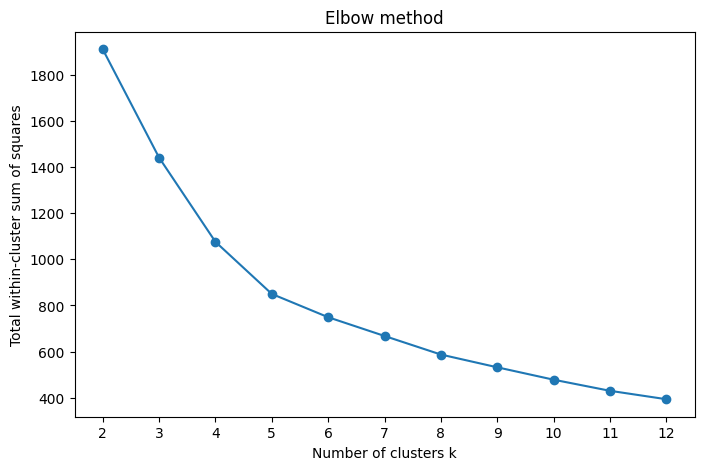

In [13]:
K = 12
tot_withinss = []

for i in range(2, K+1):
    kmeans = KMeans(n_clusters=i, n_init=100, random_state=123)
    kmeans.fit(data_scaled)
    tot_withinss.append(kmeans.inertia_)  # equivalente tot.withinss in R

plt.figure(figsize=(8,5))
plt.plot(range(2, K+1), tot_withinss, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Total within-cluster sum of squares")
plt.title("Elbow method")
plt.xticks(range(2, K+1))
plt.show()

Il **Silhouette method** è un metodo quantitativo per valutare la qualità dei cluster e scegliere il numero ottimale di cluster (K).

1. Si esegue K-Means per diversi valori di *k* (ad esempio da 2 a 12).
2. Per ogni punto, si calcola lo silhouette score:
      - a = distanza media tra il punto e tutti gli altri punti del suo cluster (cohesion)
      - b = distanza media tra il punto e tutti i punti del cluster più vicino (separation)
      - silhouette score = (b - a) / max(a, b), varia da -1 a 1
 3. Lo score medio di tutti i punti rappresenta la coesione e la separazione del clustering.

- Vicino a 1: i punti sono ben assegnati al proprio cluster.
- Vicino a 0: i punti sono al confine tra due cluster.
- Vicino a -1: i punti sono probabilmente assegnati al cluster sbagliato.

Si sceglie il valore di *k* che massimizza lo score medio silhouette. Spesso si usa in combinazione con l'Elbow Rule per confermare la scelta.

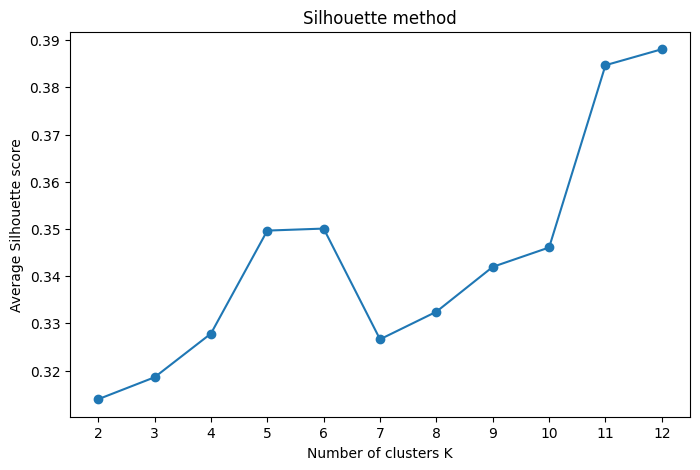

In [14]:
sil_scores = []
for i in range(2, K+1):
    kmeans = KMeans(n_clusters=i, n_init=100, random_state=47)
    labels = kmeans.fit_predict(data_scaled)
    sil = silhouette_score(data_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(range(2, K+1), sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Average Silhouette score")
plt.title("Silhouette method")
plt.xticks(range(2, K+1))
plt.show()

Confrontando i due metodi, potremmo scegliere un numro di cluster pari a 5. 

Eseguiamo l'algoritmo k-means utilizzando 5 come numero di cluster.

/tmp/ipykernel_5831/1058064044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=data_5, palette="Set2")
/tmp/ipykernel_5831/1058064044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=data_5, palette="Set2")
/tmp/ipykernel_5831/1058064044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=data_5, palette="Set2")
/tmp/ipykernel_5831/1058064044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

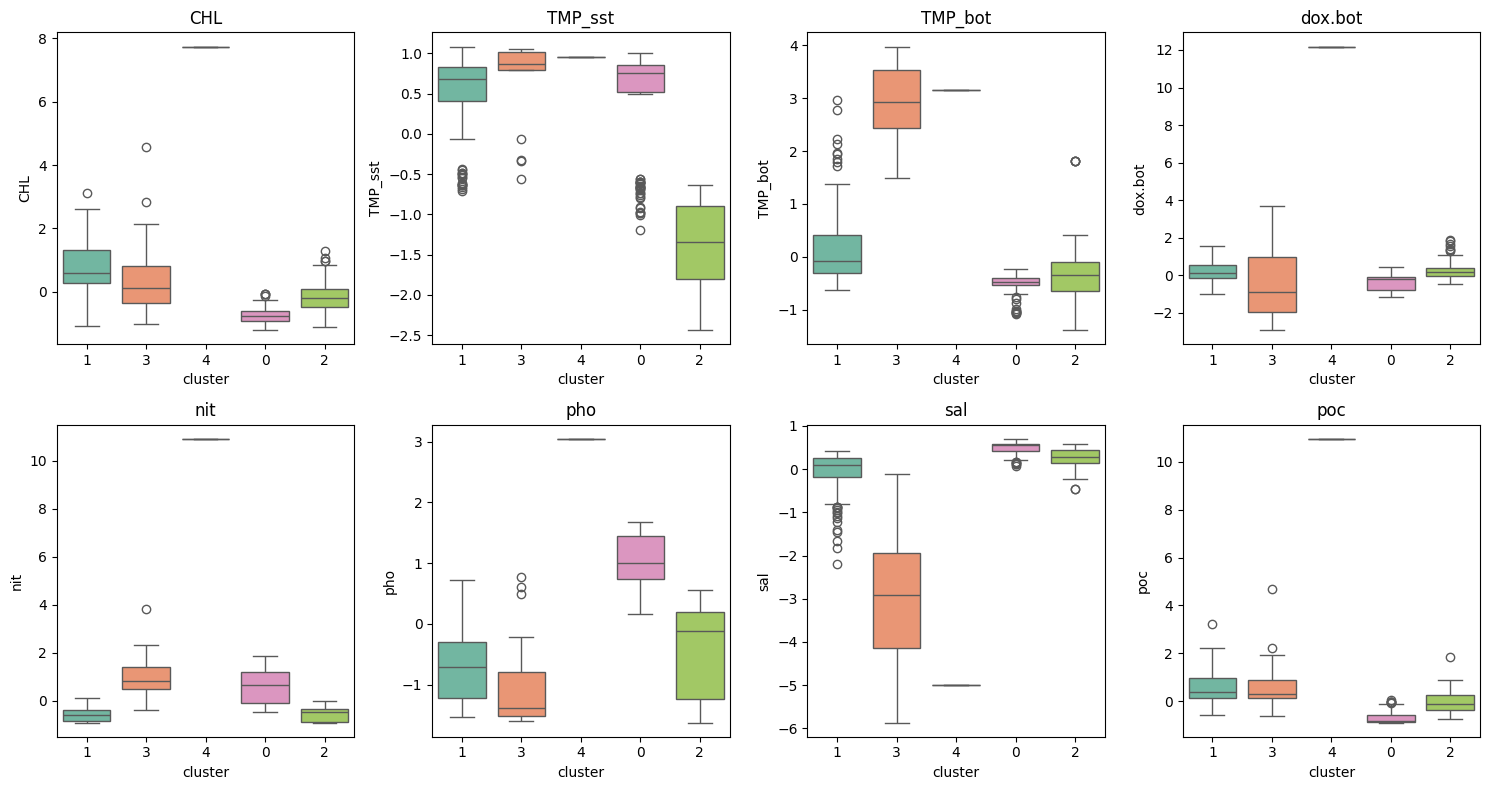

In [15]:
kmeans_5 = KMeans(n_clusters=5, n_init=100, random_state=123)
labels_5 = kmeans_5.fit_predict(data_scaled)

data_5 = data_scaled.copy()
data_5['cluster'] = labels_5.astype(str)

# Boxplot per ogni variabile per cluster
plt.figure(figsize=(15,8))
for i, col in enumerate(myvars):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='cluster', y=col, data=data_5, palette="Set2")
    plt.title(col)
plt.tight_layout()
plt.show()

- Visualizzazione

Rappresentiamo i dati originali sulla mappa colorandoli in base ai cluster ottenuti con l'algoritmo K-means.

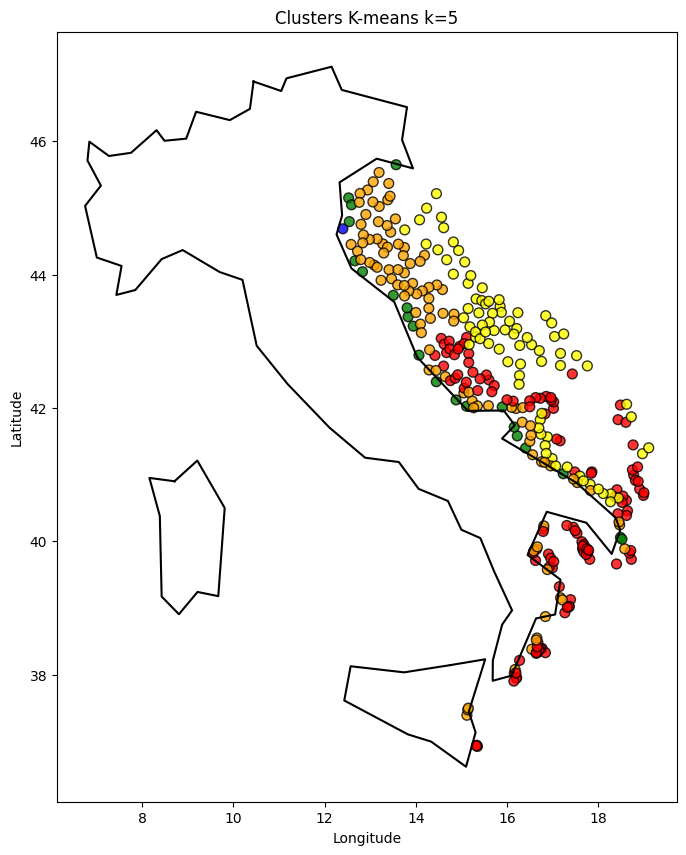

In [16]:
my_colors = ['red', 'orange', 'yellow', 'green', 'blue']
custom_cmap = ListedColormap(my_colors)

# Plot cartina Italia
with open("../data/italy_border.json") as f:
    geojson = json.load(f)


plt.figure(figsize=(8,10))

geom = geojson['features'][0]['geometry']
if geom['type'] == 'Polygon':
    for ring in geom['coordinates']:
        df_poly = pd.DataFrame(ring, columns=['X','Y'])
        plt.plot(df_poly['X'], df_poly['Y'], color='black')
elif geom['type'] == 'MultiPolygon':
    for polygon in geom['coordinates']:
        for ring in polygon:
            df_poly = pd.DataFrame(ring, columns=['X','Y'])
            plt.plot(df_poly['X'], df_poly['Y'], color='black')

# Aggiungiamo i punti del dataset colorati in base al cluster di appartenenza
plt.scatter(
    df['X'], df['Y'],
    c=data_5['cluster'].astype(int),
    cmap=custom_cmap, #'Set2',
    s=50,
    edgecolor='k',
    alpha=0.8
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters K-means k=5")
plt.show()